## The 3D FaCE: Fisher and Covariance Estimator

#### Developer: Dimitrios Tanoglidis

We develop a code that estimates the Fisher Matrix and the corresponding approximation for the covariance matrix ($C = F^{-1}$), for the 3D power spectrum.

At this stage the code is simple. We perform the forecast for the cosmological parameters: $\Theta_{c} = \left\lbrace \Omega_{m,0}, \sigma_8 \right\rbrace$, the gaussian photometric error spread $\sigma_{z}$ and the redshift where the calculation is performed, $z$.

Here we briefly review the relevant formalism we are going to use.

Here we consider the analysis only in one redshift bin, from $z_{min}$ to $z_{max}$. The Fisher matrix for the cosmological parameters $\theta_i$ is (see arXiv: 1608.00458):

\begin{equation}
\boxed{
F_{ij} = \frac{1}{8 \pi^2} \int_{-1}^{+1} d \mu \int_{k_{min}}^{k_{max}}k^2 dk \frac{\partial \ln P_g(k,\mu; z)}{\partial \theta_i} \frac{\partial \ln P_g(k, \mu ; z)}{\partial \theta_j} V_{eff}(k,\mu),} \qquad (1a)
\end{equation}

For the mixed terms, between cosmological parameters $\theta_i$ and redshift $z$, the formula is similarly:

\begin{equation}
\boxed{F_{iz} = \frac{1}{8 \pi^2} \int_{-1}^{+1} d \mu \int_{k_{min}}^{k_{max}}k^2 dk \frac{\partial \ln P_g(k,\mu; z)}{\partial \theta_i} \frac{\partial \ln P_g(k, \mu ; z)}{\partial z} V_{eff}(k,\mu),} \qquad (1b)
\end{equation}

while, for the term that has to do with the redshift:

\begin{equation}
\boxed{
F_{zz} = \frac{1}{\left(\Delta z /6 \right)^2} + \frac{1}{8 \pi^2} \int_{-1}^{+1} d \mu \int_{k_{min}}^{k_{max}}k^2 dk \left(\frac{\partial \ln P_g(k,\mu; z)}{\partial z}\right)^2  V_{eff}(k,\mu)} \qquad  (1c)
\end{equation}

The generalization for more than one redshift slices can be found in arXiv: 1608.00458. In the above, $\Delta z$ is the width of the redshift slice, $\Delta z = z_{max} - z_{min}$.

Note that in most cases, the integrand is even in $\mu$; in such a case, we can substitute $\frac{1}{8 \pi^2} \int_{-1}^{+1} d\mu \to \frac{1}{4\pi^2} \int_0^{+1} d\mu$. This may seem to be quite trivial; but it can be  valuable when we calculate integrals numerically, especial using the interpolation methods.

Let's discuss about the quantities that enter into the integral. 

We model the galaxy power spectrum, under the presence of photometric redshift errors, in redshift space, as:
\begin{equation}
\boxed{
P_g(k,\mu; z) = (b + f \mu^2)^2 D^2(z)P_{m,0}(k)\exp\left[- \frac{k^2\mu^2c^2 \sigma_{z,0}^2(1+z)^2}{H^2(z)} \right]}, \qquad (2)
\end{equation}

Here we have considered the linear power spectrum. We can do this, since  in the integral above we will use as $k_{max}$ a number such as the non-linear part of the power spectrum is not included in the calculation, like $0.1 h$ Mpc$^{-1}$.

The fiducial model for the bias is : $b(z) = 1/D(z)$. $f$ is the growth rate, defined as $f \equiv \frac{d \ln D}{d \ln a}$. In $\Lambda$cdm cosmology, to a very good approximation we have that $f = \Omega_m(z)^\gamma$ with $\gamma \cong 0.545$. $D(z)$ is the linar growth factor normalized to the present day ($ D =1$ at $z = 0$).

Note that: 

\begin{equation}
f = \frac{d \ln D}{d \ln a} = - \frac{1 +z}{D}\frac{d D}{d z}. \qquad (3)
\end{equation}


The term $V_{eff}(k,\mu)$ in equation (1) takes into account the number of modes inside the volume of the redshift bin, and is given by:

\begin{equation}
\boxed{
V_{eff}(k,\mu) = \left[\frac{\overline{n}_i P_g(k,\mu)}{\overline{n}_i P_g(k,\mu) + 1} \right]^2 V_{i},} \qquad (4)
\end{equation}

where $V_i$ the volume of redshift bin $i$, is given by:

\begin{equation}
V_i = \frac{4\pi}{3}\times f_{sky} \left[d_c^3(z_{max}) - d_c^3(z_{min}) \right]. \qquad (5)
\end{equation}

Here $d_c(z)$ is the comoving distance to redshift $z$, : $d_c(z) = \int_0^z \frac{c}{H(z)}dz$. $\overline{n}_i$ is the average number density of galaxies inside the bin $i$; given the redshift distribution $dN/dz$ of galaxies, this can be calculated as:

\begin{equation}
\overline{n}_i = \frac{4\pi f_{sky}}{V_i}\int_{z_{min}}^{z_{max}} dz \frac{dN}{dz}(z) \qquad (6)
\end{equation}

### =========================================================================================

Let's now discuss about a few practical issues related to the calculations. Here we restrict ourselves to the case we consider, it is not the most general case. Using (3) and the fiducial model for the linear bias, power spectrum (2) becomes:

\begin{equation}
P_{g}(k,\mu;z) = \left(1 - (1+z) \frac{dD}{dz}\mu^2\right)^2 \, P_m(k) \,\exp\left[- \frac{k^2\mu^2c^2 \sigma_{z,0}^2(1+z)^2}{H^2(z)} \right] \qquad (7)
\end{equation}

and the logarithm is:
\begin{equation}
\ln P_g(k,\mu;z) = 2\ln \left(1 - (1+z)\frac{dD}{dz}\mu^2 \right) + \ln P_m(k) - \frac{k^2\mu^2c^2}{H(z)^2}(1+z)^2\sigma_z^2 \qquad (8)
\end{equation}

This allows us to take the derivatives:

\begin{equation}
\frac{\partial \ln P_g}{\partial \sigma_z} = - 2\sigma_z \frac{k^2\mu^2 c^2}{H^2}(1+z)^2 \qquad (9)
\end{equation}

\begin{equation}
\frac{\partial \ln P_g}{\partial z} = 2\mu^2 \left[\frac{k^2c^2(1+z)\sigma_z^2}{H^2}\left(\frac{(1+z)dH/dz}{H} -1  \right) - \frac{dD/dz + (1+z) d^2D/dz^2}{1 - (1+z)\frac{dD}{dz}\mu^2}\right]  \qquad (10)
\end{equation}

And now the derivatives with respect to the cosmological parameters $\theta_i$:

\begin{equation}
\frac{\partial \ln P_g}{\partial \theta_i} = \frac{-2}{1 - (1+z)\frac{dD}{dz}\mu^2}(1+z)\frac{\partial}{\partial \theta_i}\left(\frac{dD}{dz} \right)\mu^2 + \frac{1}{P_m(k)}\frac{\partial P_m(k)}{\partial \theta_i} +  \frac{2}{H^3}k^2\mu^2c^2(1+z)^2\sigma_z^2\frac{\partial H}{\partial \theta_i} \qquad (11)
\end{equation}


Whenever we have to evaluate derivatives numerically, we use the symmetric five point stencil:

\begin{equation}
f'(x) = \frac{-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x - 2h)}{12h} \qquad (12)
\end{equation}

In [96]:
# Importing stuff

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
import pylab as pl
from scipy import interpolate 
from code.plot_utils import plot_pretty
from scipy.interpolate import RectBivariateSpline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
# Define here functions that can be used to take the numerical derivatives with respect to matter density and sigma_8


# First the functions that calculate for 
def matter_var(k, z,  omeg_var):
    """
    Returns for a variable value of the matter density the dD/dz, P_m(k) - the power spectrum - 
    and the Hubble parameter
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    dDdz, P_M(k), H 
    """
    
    # define cosmology with variable omega_mu 
    
    params_mat_var = {'flat': True, 'H0': 67.2, 'Om0': omeg_var, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
    cosmo_mat_var = cosmology.setCosmology('myCosmo',params_mat_var)
    
    dDdz_mat_var = cosmo_mat_var.growthFactor(z, derivative=1, inverse=False)
    P_mat_var = cosmo_mat_var.matterPowerSpectrum(k, Pk_source='eh98', derivative=False)
    H_mat_var = cosmo_mat_var.Hz(z)
    
    return dDdz_mat_var, P_mat_var, H_mat_var

#========================================================================================================
#========================================================================================================

def sigma_8_var(k, z, sigma_var):
    """
    Returns for a variable value of sigma_8 the dD/dz, P_m(k) - the power spectrum - 
    and the Hubble parameter
    #--------------------------------------
    params
    k : wavenumbers
    omeg_var : variable omega
    z: redshift of calculation
    #--------------------------------------
    returns:
    dDdz, P_M(k), H 
    """
    
    # define cosmoloft with variable sigma_8
    
    params_sig_var = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': sigma_var, 'ns': 0.95}
    cosmo_sig_var = cosmology.setCosmology('myCosmo',params_sig_var)
    #-----------------------------------------------------------------------------
    dDdz_sig_var = cosmo_sig_var.growthFactor(z, derivative=1, inverse=False)
    P_sig_var = cosmo_sig_var.matterPowerSpectrum(k, Pk_source='eh98', derivative=False)
    H_sig_var = cosmo_sig_var.Hz(z)
    
    return dDdz_sig_var, P_sig_var, H_sig_var
    
#==========================================================================================================
#==========================================================================================================
#===============================================================
# Functions that calculate the derivatives with respect to matter density and sigma_8 
#===============================================================
#=========================================================================================================
#=========================================================================================================

#Derivatives with respect to matter density 

def matter_derivs(k,z, omega_mu):
    """
    Function that calculates all the derivatives with respect to matter density 

    returns: dDdOm, dPmdOm, dHdOm
    
    """
    #step
    h = omega_mu/100.0
    
    D_1, P_1, H_1 = matter_var(k,z, omega_mu + 2.0*h)
    D_2, P_2, H_2 = matter_var(k, z, omega_mu + h)
    D_3, P_3, H_3 = matter_var(k, z, omega_mu - h)
    D_4, P_4, H_4 = matter_var(k,z, omega_mu - 2.0*h)
    
    #Calculation of derivatives
    
    dD_mat = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    dP_mat = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    dH_mat = (- H_1 + 8.0*H_2 - 8.0*H_3 + H_4)/(12.0*h)
    
    return dD_mat, dP_mat, dH_mat 

# Derivatives with respect to sigma_8
    
def sigma_derivs(k,z, sigma_8):
    """
    Function that calculates all the derivatives with respect to matter density 

    returns: dDdsig8, dPmdsig8, dHdsig8
    
    """
    #step
    h = sigma_8/100.0
    
    D_1, P_1, H_1 = sigma_8_var(k,z, sigma_8 + 2.0*h)
    D_2, P_2, H_2 = sigma_8_var(k, z, sigma_8 + h)
    D_3, P_3, H_3 = sigma_8_var(k, z, sigma_8 - h)
    D_4, P_4, H_4 = sigma_8_var(k,z, sigma_8 - 2.0*h)
    
    #Calculation of derivatives
    
    dD_sig = (- D_1 + 8.0*D_2 - 8.0*D_3 + D_4)/(12.0*h)
    dP_sig = (- P_1 + 8.0*P_2 - 8.0*P_3 + P_4)/(12.0*h)
    dH_sig = (- H_1 + 8.0*H_2 - 8.0*H_3 + H_4)/(12.0*h)
    
    return dD_sig, dP_sig, dH_sig 

In [98]:

# Define here the main function that calculates the Fisher Matrix

def Fish_Estimate(z_min, z_max, k_min, k_max, f_sky, n_dens, **fidpars):
    
    
    """
    This function calculates the Fisher Matrix 
    ------------------------------------------
    ------------------------------------------
    
    Parameters:
    ------------------------------------------
    z_min: float, minimum redshift of the bin
    
    z_max: float, maximum redshift of the bin
    
    k_min: float, minimum k  in the calculation of the Fisher Matrix in h/Mpc 
    
    k_max: float, maximum k in the calculation of the Fisher Matrix in h/Mpc
    
    f_sky: float, fraction of the sky that the survey covers. e.g. 0.12 for DES
    
    n_dens: float, the number density of galaxies inside the redshift bin in h^3/Mpc^3 
    
    Returns:
    ------------------------------------------
    
    Fisher_matr: 2 dimensional array of floats containing the elements of the Fisher Matrix
    
    """
    #==================================================
    # Set constants and parameters that we will need
    
    # speed of light in Mpc/s
    
    c = 9.7156e-15
    
    #prefactor of all integrals  - 1/4pi^2
    
    pref = 1.0/(4.0*np.pi**2.0)
    
    #mean redshift - all calculation will be done with this fiducial redshift
    
    z = (z_min + z_max)/2.0
    
    #fiducial parameters --- in a later version, the user will be able to give them externally
    
    sigma_z  = 0.1
    
    omega_mu = 0.31
    
    sigma_8 = 0.81
    
    # k and mu
    
    k_lin_min = np.log10(k_min)
    k_lin_max = np.log10(k_max)
    
    k_lin = np.linspace(k_lin_min, k_lin_max, 1000)        #  k evenly spaced in logk
    k_val = np.power(10, k_lin)
    
    mu_val = np.linspace(0.0,1.0,1000)                     # Spacing in mu        
    
    kk,mm = np.meshgrid(k_val, mu_val)                       # Grid in order to calculate the cosm. functions for every m,k
    
    
    #========================================================
    #========================================================
    # Define fiducial cosmology - set up colossus
    
    params = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
    cosmo = cosmology.setCosmology('myCosmo',params)
    
    
    #=======================================================
    #Calculation of volume - using formula (5)
    
    dmax = cosmo.comovingDistance(0.0, z_max)
    dmin = cosmo.comovingDistance(0.0, z_min)
    vol = (4.0*np.pi/3.0)*f_sky*(dmax**3.0 - dmin**3.0)
    
    #=====================================================
    # Calculate things we will need
    
    # Hubble parameter
    H_z = cosmo.Hz(z)
    # dD/dz calculation
    dDdz = cosmo.growthFactor(z, derivative=1, inverse=False)
    # d^2D/dz^2 calculation
    d2Ddz2 = cosmo.growthFactor(z, derivative=2, inverse=False) 
    # Calculation of the exponential factor, matter power spectrum, prefactor for the power spectrum - see eq. (7)
    
    exp_fact = np.exp(- (kk*mm*c*sigma_z*(1.0 + z)/H_z)**2.0)     #Exponential factor
    prefact = (1.0 - (1.0 + z)*dDdz*(mm**2.0))**2.0               #Prefacor - RSD's
    P_k_m = cosmo.matterPowerSpectrum(kk, Pk_source='eh98', derivative=False)
    
    
    #====================================================================
    #Now the galaxy power spectrum
    
    P_gal = prefact*P_k_m*exp_fact
    
    #Calculation of the effective volume 
    
    V_eff = vol*((n_dens*P_gal/(n_dens*P_gal + 1.0))**2.0)
    
    #=========================================================================
    #=========================================================================
    # CALCULATION OF DERIVATIVES - IN THIS PART THE DERIVATIVES ARE CALCULATED
    #=========================================================================
    #=========================================================================
    # First calculation of "intermediate" derivatives 
    # We will need them in order to calculate the derivatives (10) - (11)
    
    # Calculation of dHdz
    
    hz = z/100.0
    
    dHdz =  (-cosmo.Hz(z + 2.0*hz) + 8.0*cosmo.Hz(z + hz) - 8.0*cosmo.Hz(z - hz) + cosmo.Hz(z - 2.0*hz))/(12.0*hz)
    
    # Calculation of the derivative of dD/dz, P(kk), H with respect to the two cosmological parameters 
    
    #
    
    dDdOm, dPmdOm, dHdOm  =  matter_derivs(kk,z, omega_mu)
    
    dDdsig8, dPmdsig8, dHdsig8 = sigma_derivs(kk,z, sigma_8)
    
    
    #========================================================================
    #Calculation of the derivatives (9 - 11)
    
    # Derivative with respect to sigma_z - see eq. (9)
    
    dlnPdsigma = - 2.0*sigma_z*((kk*mm*c*(1.0+z)/H_z)**2.0)
    
    # Derivative with respect to z  - see eq. (10)
    
    part_1 = ((kk*c*sigma_z/H_z)**2.0)*(1.0 + z)*(((1.0 + z)*dHdz/H_z) - 1.0)
    part_2 = (dDdz + (1.0+z)*d2Ddz2)/(1.0 - (1.0 + z)*dDdz*(mm**2.0))
    
    dlnPdz = 2.0*(part_1 - part_2)*(mm**2.0)
    
    # Derivative with respect to Omega_m - equation (11) with \theta = Om 
    
    part_1 = -(2.0*(1.0 + z)*dDdOm*(mm**2.0))/(1.0 - (1.0 + z)*dDdz*(mm**2.0)) 
    part_2 = dPmdOm/P_k_m
    part_3 = (2.0*dHdOm/(H_z**3.0))*((kk**mm**c*sigma_z*(1.0+z))**2.0)
    
    dlnPdOm =  part_1 + part_2 + part_3
    
    # Derivative with respect to sigma_8 - equation (11) with \theta = sigma_8
    
    part_1 = -(2.0*(1.0 + z)*dDdsig8*(mm**2.0))/(1.0 - (1.0 + z)*dDdz*(mm**2.0)) 
    part_2 = dPmdsig8/P_k_m
    part_3 = (2.0*dHdsig8/(H_z**3.0))*((kk**mm**c*sigma_z*(1.0+z))**2.0)
    
    dlnPdsig8 = part_1 + part_2 + part_3 
    
    
    #=====================================================================================
    #=====================================================================================
    # FISHER MATRIX ELEMENTS CALCULATION
    #=====================================================================================
    #=====================================================================================
    # Here we calculate the Fisher Matrix elements
    
    # 1 = Omega_m, 2 = sigma_8, 3 =  sigma_z, 4 = z
    
    # The common factor that all integrals have 
    
    com_fact = np.log(10.0)*pref*(kk**3.0)*V_eff
    
    #========================================================
    # First diagonal terms
    #========================================================
    
    integrand_11 = com_fact*(dlnPdOm**2.0)
    int_spl_11 = RectBivariateSpline(k_lin, mu_val, integrand_11)
    
    F_11 = int_spl_11.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_11 calculated")
    
    #-------------------------------------------------------
    
    integrand_22 = com_fact*(dlnPdsig8**2.0)
    int_spl_22 = RectBivariateSpline(k_lin, mu_val, integrand_22)
    
    F_22 = int_spl_22.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_22 calculated")
    #-------------------------------------------------------
    
    integrand_33 = com_fact*(dlnPdsigma**2.0)
    int_spl_33 = RectBivariateSpline(k_lin, mu_val, integrand_33)
    
    F_33 = int_spl_22.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_33 calculated")
    #-------------------------------------------------------
    
    integrand_44 = com_fact*(dlnPdz**2.0)
    int_spl_44 = RectBivariateSpline(k_lin, mu_val, integrand_44)
    
    F_44 = 1.0/(((z_max - z_min)/6.0)**2.0)   + int_spl_44.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_44 calculated")
    #=======================================================
    # Then off diagonal terms
    #=======================================================
    
    integrand_12 = com_fact*(dlnPdOm*dlnPdsig8)
    int_spl_12 = RectBivariateSpline(k_lin, mu_val, integrand_12)
    
    F_12 = int_spl_12.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_12 calculated")
    #------------------------------------------------------
    
    integrand_13 = com_fact*(dlnPdOm*dlnPdsigma)
    int_spl_13 = RectBivariateSpline(k_lin, mu_val, integrand_13)
    
    F_13 =int_spl_13.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_13 calculated")
    #------------------------------------------------------
    
    integrand_14 = com_fact*(dlnPdOm*dlnPdz)
    int_spl_14 = RectBivariateSpline(k_lin, mu_val, integrand_14)
    
    F_14 = int_spl_14.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_14 calculated")
    #------------------------------------------------------
    
    integrand_23 = com_fact*(dlnPdsig8*dlnPdsigma)
    int_spl_23 = RectBivariateSpline(k_lin, mu_val, integrand_23)
    
    F_23 = int_spl_23.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_23 calculated")
    #------------------------------------------------------
    
    integrand_24 = com_fact*(dlnPdsig8*dlnPdz)
    int_spl_24 = RectBivariateSpline(k_lin, mu_val, integrand_24)
    
    F_24 = int_spl_24.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_24 calculated")
    #------------------------------------------------------
    
    integrand_34 = com_fact*(dlnPdsigma*dlnPdz)
    int_spl_34 = RectBivariateSpline(k_lin, mu_val, integrand_34)
    
    F_34 = int_spl_34.integral(k_lin_min, k_lin_max, 0.0, 1.0)
    print("F_34 calculated")
    #==========================================================
    #==========================================================
    
    
    
    return F_11,F_22,F_33,F_44,F_12,F_13,F_14,F_23,F_24,F_34
    
    
    
    
    
    
    

In [99]:
z_min = 0.4
z_max = 0.6
F_11,F_22,F_33,F_44,F_12,F_13,F_14,F_23,F_24,F_34 = Fish_Estimate(z_min, z_max, 1.0e-3, 0.1, 0.12, 0.15)

F_11 calculated
F_22 calculated
F_33 calculated
F_44 calculated
F_12 calculated
F_13 calculated
F_14 calculated
F_23 calculated
F_24 calculated
F_34 calculated


## Using CosmicFish to Plot

Use the Cosmic Fish code to plot things -  Make a triangular plot

In [100]:
import numpy as np
import math
import sys
import os
import IPython

In [101]:
cosmicfish_pylib_path = '/Users/Dimitris/Desktop/FaCE/CosmicFish/python'
sys.path.insert(0, os.path.normpath(cosmicfish_pylib_path))

In [102]:
import cosmicfish_pylib.utilities            as fu
import cosmicfish_pylib.colors               as fc
import cosmicfish_pylib.fisher_matrix        as fm
import cosmicfish_pylib.fisher_derived       as fd
import cosmicfish_pylib.fisher_operations    as fo
import cosmicfish_pylib.fisher_plot_settings as fps
import cosmicfish_pylib.fisher_plot_analysis as fpa
import cosmicfish_pylib.fisher_plot          as fp

In [103]:
fu.CosmicFish_write_header('Plotting our Fisher matrices')


**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ Py Lib
 
**************************************************************
Plotting our Fisher matrices
 This application was developed using the CosmicFish code.
**************************************************************



### Define and Analyze Fisher Matrix

In [104]:
matrix = [ [F_11, F_12, F_13, F_14],
        [F_12, F_22, F_23, F_24],
        [F_13, F_23, F_33, F_34],
          [F_14, F_24, F_34, F_44]]

param_names = ['$\Omega_{\mbox{m},0}$', '$\sigma_8$', '$\sigma_z$', '$z$']

fiducial = [0.31, 0.81, 0.1, (z_min+ z_max)*0.5 ]


In [105]:
fisher = fm.fisher_matrix( fisher_matrix=matrix, fiducial = fiducial, param_names=param_names )

fisher.name = '3D_analysis - 4 parameters'

fisher_list = fpa.CosmicFish_FisherAnalysis()
fisher_list.add_fisher_matrix([fisher])
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list)

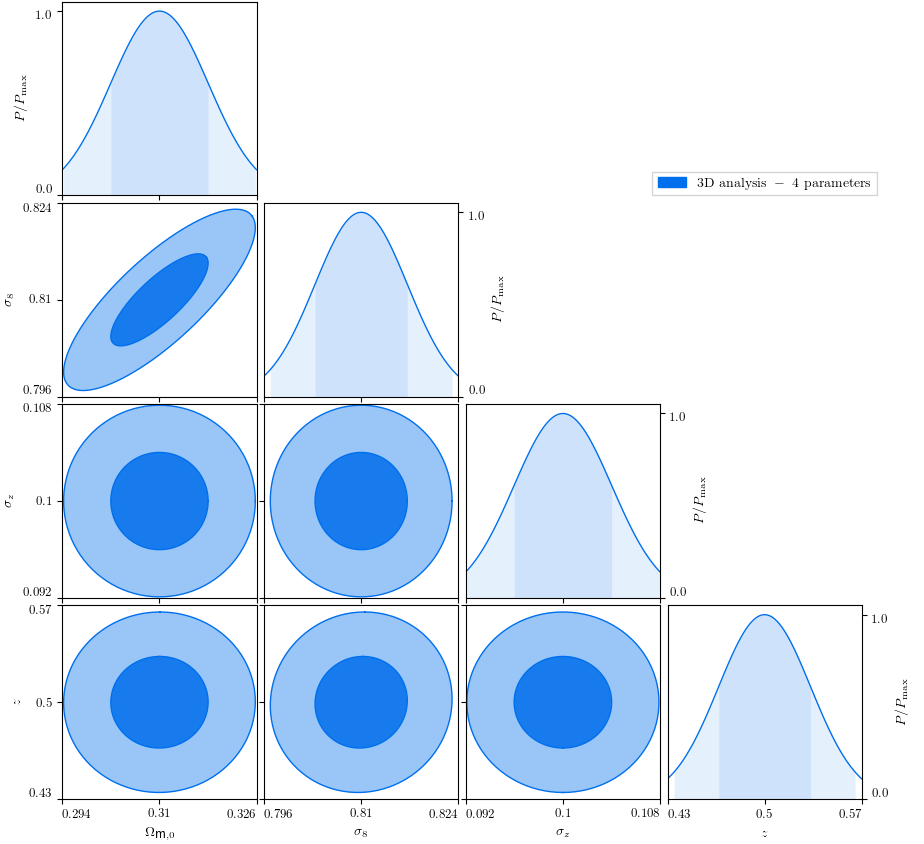

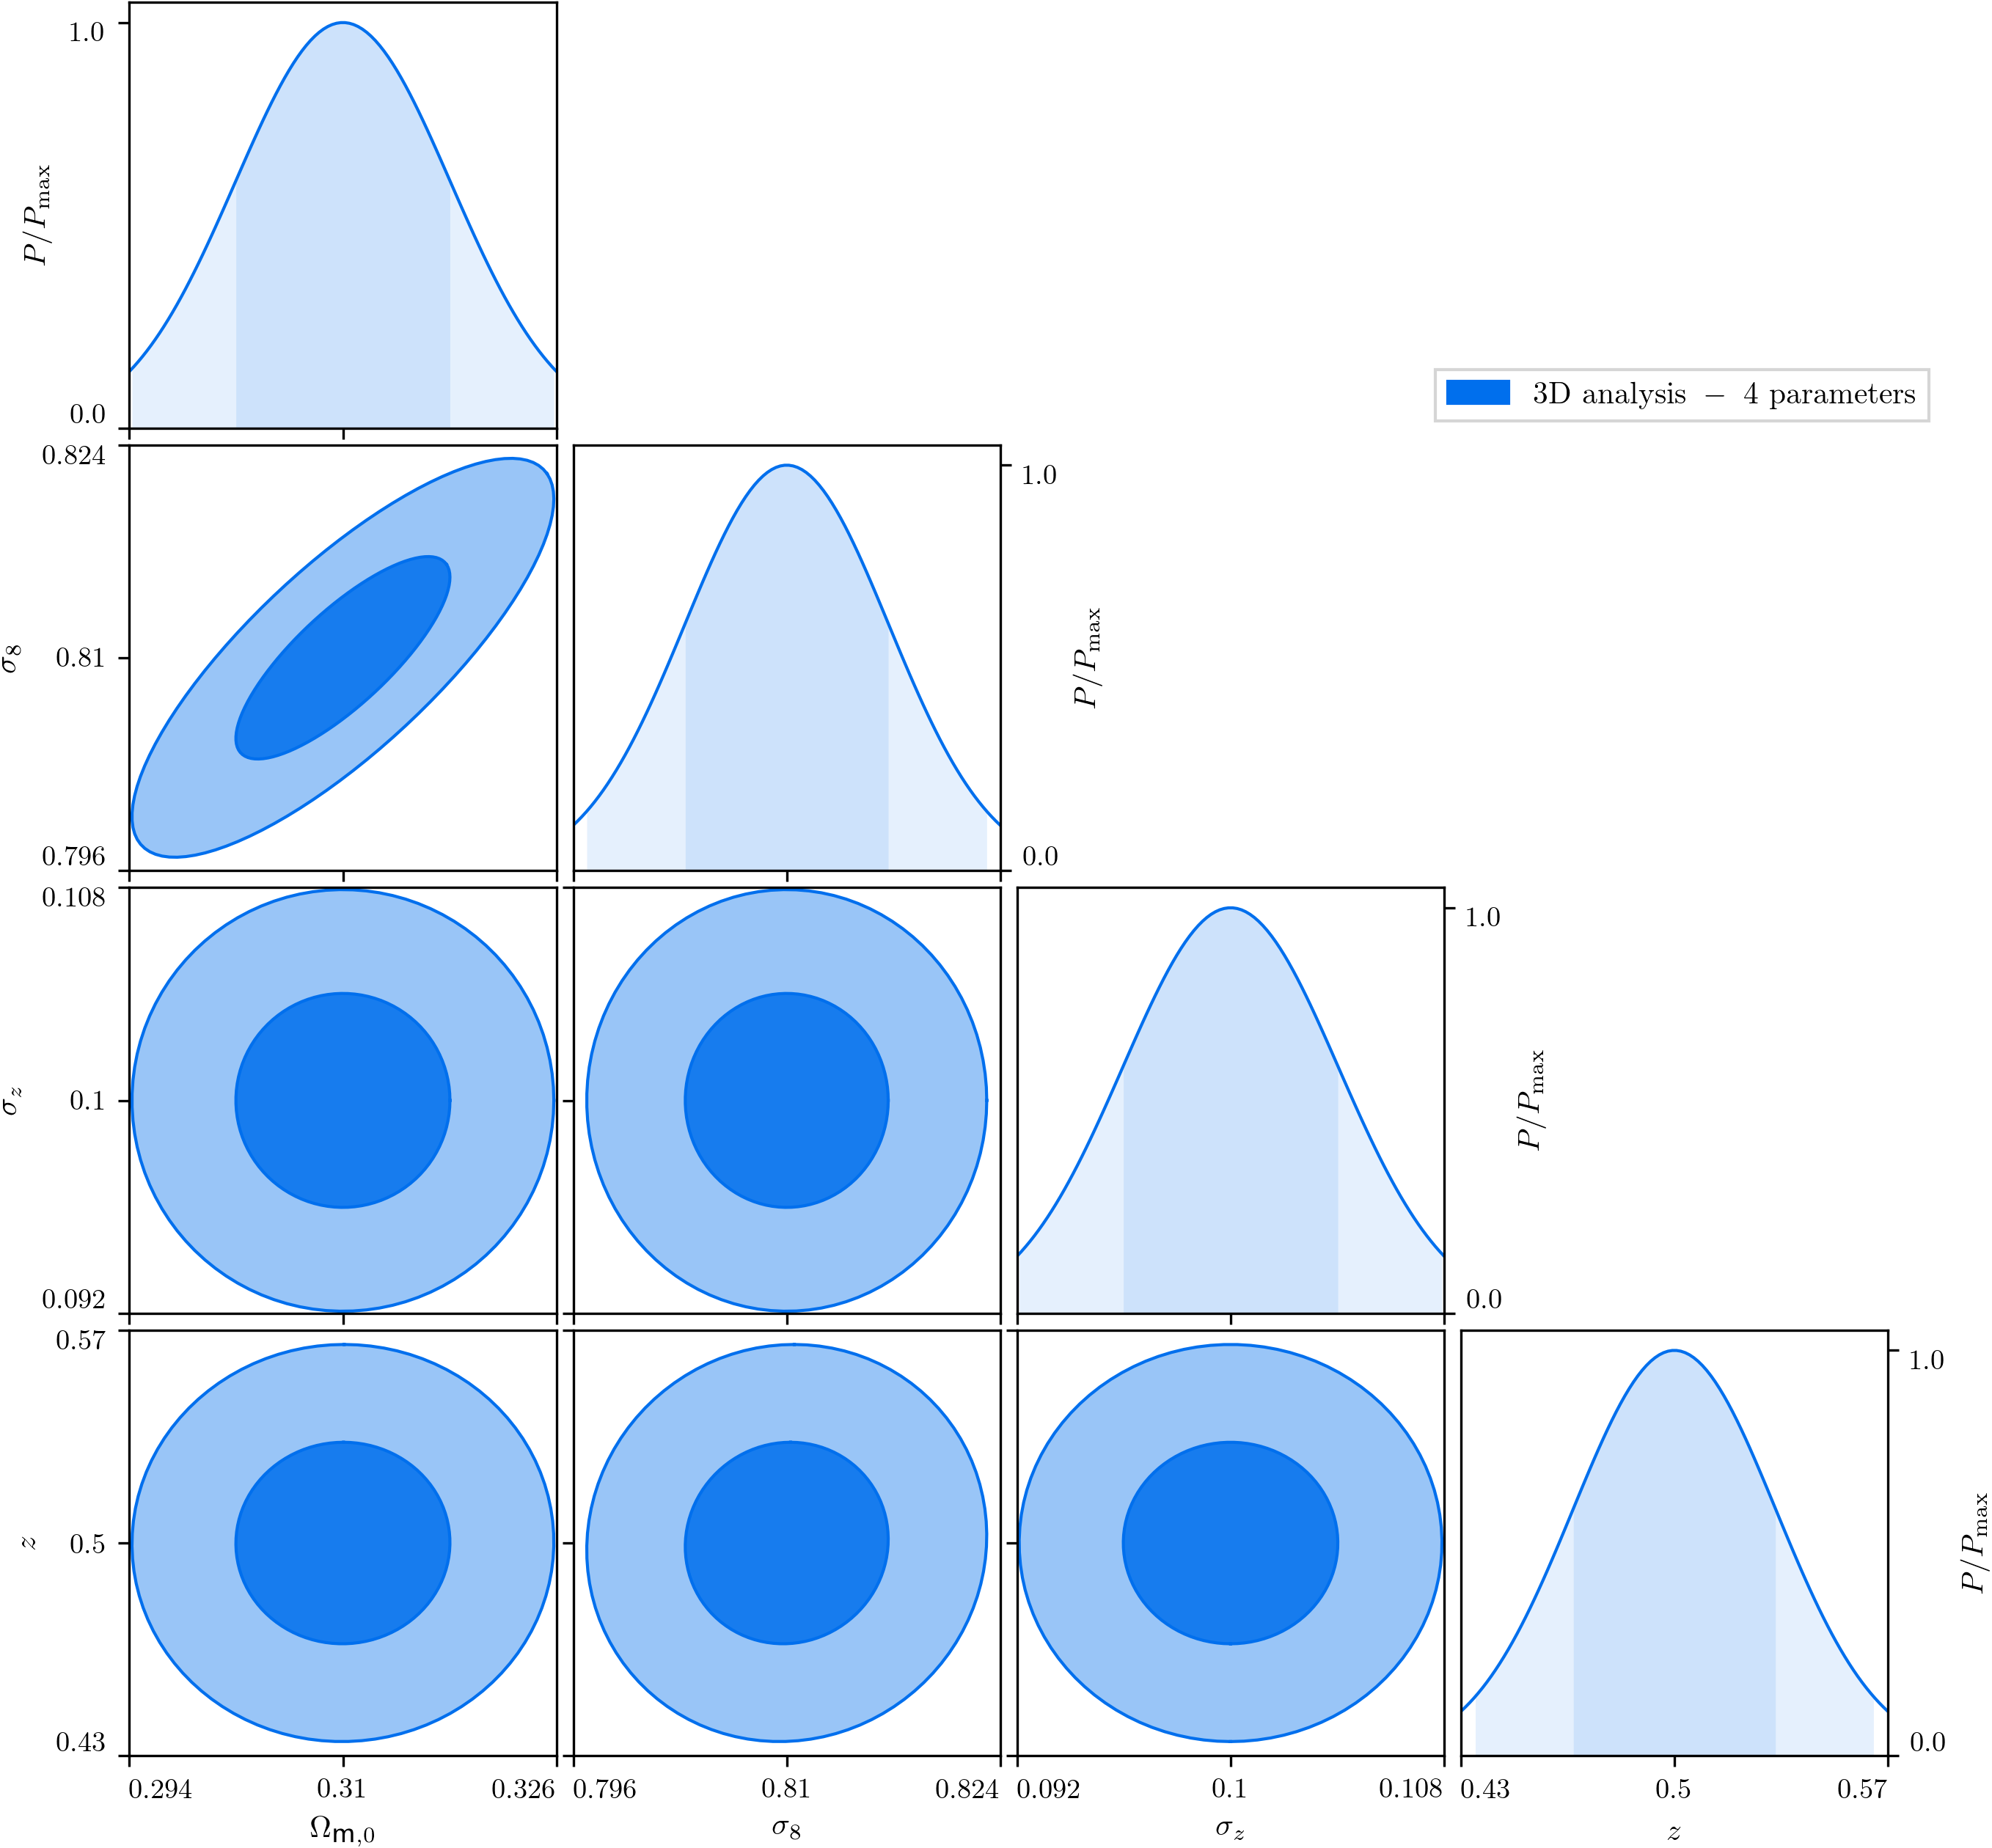

In [108]:
fisher_plotter.new_plot()
fisher_plotter.plot_tri()
fisher_plotter.export('corner_plot.png', dpi=100)
IPython.display.Image(filename='corner_plot.png',unconfined=True) 